### Try to answer these questions!

- Try to extract interesting information from the data set using the techniques we have learned so far! Such as the dimension of the data set, data types of each column, number of distinct values for column(s) of interest, and descriptive statistics of all the numerical variables.
- Draw a correlation heatmap to see the associations among different numerical variables. Which variables have the highest association? How about the lowest?
- Draw a pairplot but by using `Species` variable for coloring. Do you observe anything interesting?
- Draw a boxplot of `Petal.Width` across `Species`. What do you find interesting?
- Create a summary table showing the mean and standard deviation of each numerical variable per each species.
- Try Linear Regression on the two numerical variables, `Petal.Length` and `Petal.Width`. What kind of conclusions can you derive?
- Generate a decision tree with `max_depth = 2` where the target variable is `Species` and the independent variables are all the numerical variables from the `iris` data set. Which variables are the most important in determining `Species`? Do you think our decision tree is a "good" classifier?
- Using your decision tree, try predicting the species of the following data from iris flowers:
    - $[Sepal.Length, Sepal.Width, Petal.Length, Petal.Width] = [[7.5, 3, 6, 2.1], [6, 2.9, 4, 1.2], [4.9, 3.4, 1.5, 0.5]]$.

In [8]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iris = pd.read_csv("IRIS.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [11]:
iris.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: >

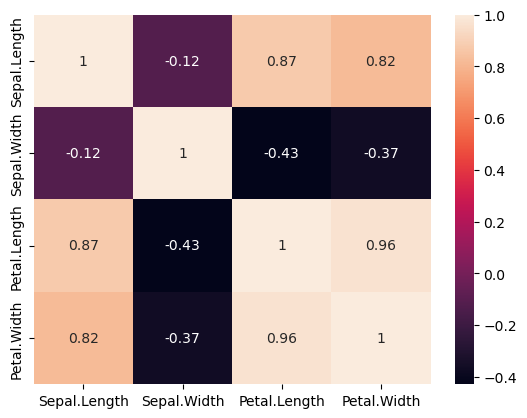

In [12]:
# calculate the correlation matrix on the numeric columns
iris_corr = iris.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(iris_corr, annot = True)

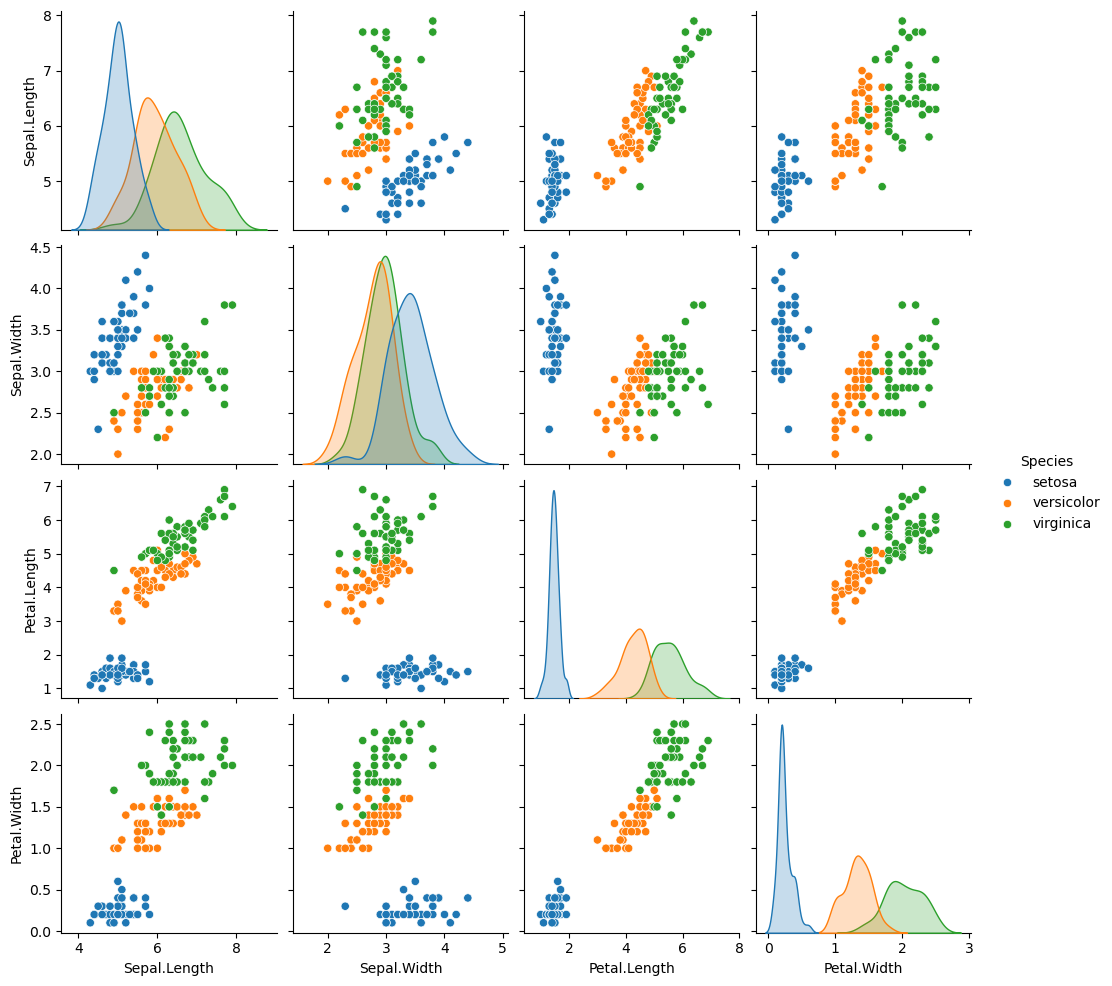

In [13]:
sns.pairplot(iris, hue= "Species")

<Axes: xlabel='Species', ylabel='Petal.Width'>

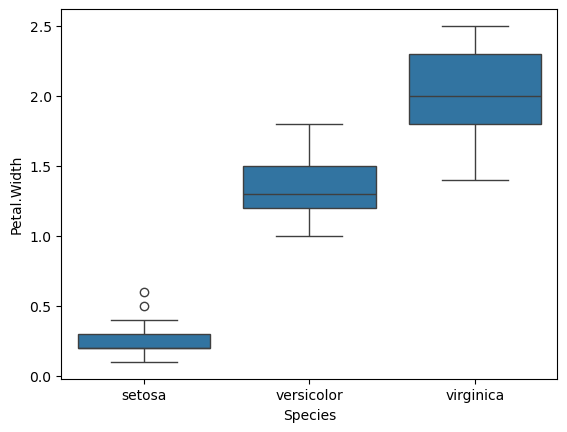

In [14]:
sns.boxplot(data = iris, x = 'Species', y = 'Petal.Width')

In [15]:
stat_list = ["mean", "std"]
iris.groupby("Species")[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]].agg(stat_list)

Sepal.Length           Sepal.Width           Petal.Length  \
                   mean       std        mean       std         mean   
Species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     Petal.Width            
                 std        mean       std  
Species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

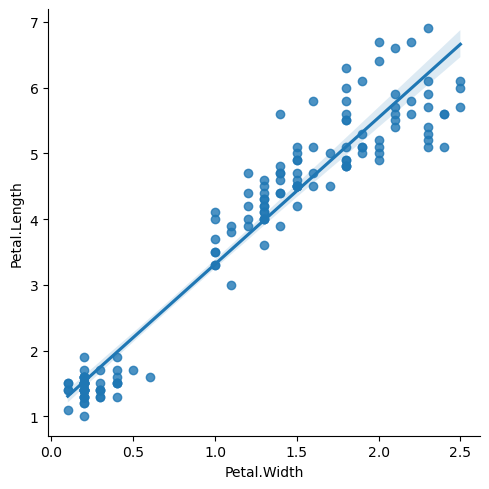

In [16]:
sns.lmplot(data = iris, x = "Petal.Width", y = "Petal.Length")

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
# Create a least squares model for the 'Petal.Width' and 'Petal.Length' variables from our data set
y = iris["Petal.Length"]
x = iris["Petal.Width"]
X = sm.add_constant(x)

iris_model1 = sm.OLS(y, X)
fit1 = iris_model1.fit()

# Display the summary of our model
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Petal.Length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.68e-86
Time:                        23:04:06   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0836      0.073     14.850      0.000       0.939       1.228
Petal.Width     2.2299      0.051     43.387      0.000       2.128       2.332
==============================================================================
Omnibus:                        2.438   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.966
Skew:                           0.211   Prob(JB):                        0.374
Kurtosis:                       3.369   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
from sklearn import tree

X = iris.select_dtypes('number')
y = iris.loc[:,"Species"] #species
model2 = tree.DecisionTreeClassifier(max_depth=2)
model2 = model2.fit(X, y)

# Get the feature names
feature_names = X.columns.tolist()

[Text(0.4, 0.8333333333333334, 'Petal.Width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'Petal.Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

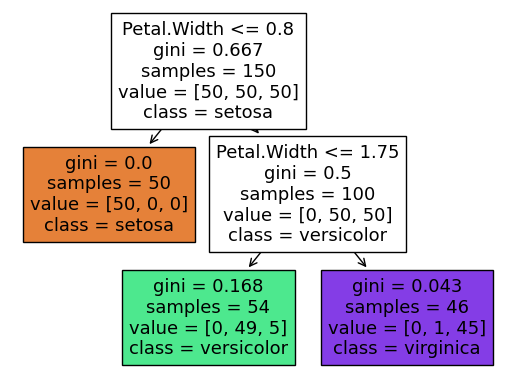

In [19]:
# Sepal.Length	Sepal.Width	 Petal.Length	Petal.Width
tree.plot_tree(model2, feature_names=feature_names, class_names=model2.classes_, filled=True)

In [20]:
X_test = [[7.5, 3, 6, 2.1], [6, 2.9, 4, 1.2], [4.9, 3.4, 1.5, 0.5]]
model2.predict(X_test)

C:\Users\Kiwon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'versicolor', 'setosa'], dtype=object)